<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Heart_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msn
import plotly.express as px

In [3]:
# load the dataset
heart_analysis = pd.read_csv('/content/heart_2022_with_nans (1).csv')

In [ ]:
# data exploration
heart_analysis.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
heart_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386196 entries, 0 to 386195
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      386196 non-null  object 
 1   Sex                        386196 non-null  object 
 2   GeneralHealth              386196 non-null  object 
 3   PhysicalHealthDays         386196 non-null  float64
 4   MentalHealthDays           386196 non-null  float64
 5   LastCheckupTime            378935 non-null  object 
 6   PhysicalActivities         386196 non-null  object 
 7   SleepHours                 386196 non-null  float64
 8   RemovedTeeth               386196 non-null  object 
 9   HadHeartAttack             386196 non-null  object 
 10  HadAngina                  386196 non-null  object 
 11  HadStroke                  386196 non-null  object 
 12  HadAsthma                  386196 non-null  object 
 13  HadSkinCancer              38

## **Data Cleaning**

In [4]:
# cheking missing values
heart_analysis.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,374
PhysicalHealthDays,3618
MentalHealthDays,2915
LastCheckupTime,2682
PhysicalActivities,384
SleepHours,1726
RemovedTeeth,4508
HadHeartAttack,1064


In [5]:
# percentage of missing values
heart_analysis.isnull().mean()*100

,0
State,0.000000
Sex,0.000000
GeneralHealth,0.265595
PhysicalHealthDays,2.569310
MentalHealthDays,2.070077
LastCheckupTime,1.904613
PhysicalActivities,0.272696
SleepHours,1.225713
RemovedTeeth,3.201341
HadHeartAttack,0.755596


In [7]:
heart_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140816 entries, 0 to 140815
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      140816 non-null  object 
 1   Sex                        140816 non-null  object 
 2   GeneralHealth              140816 non-null  object 
 3   PhysicalHealthDays         137198 non-null  float64
 4   MentalHealthDays           137901 non-null  float64
 5   LastCheckupTime            140816 non-null  object 
 6   PhysicalActivities         140816 non-null  object 
 7   SleepHours                 139090 non-null  float64
 8   RemovedTeeth               140816 non-null  object 
 9   HadHeartAttack             140816 non-null  object 
 10  HadAngina                  140816 non-null  object 
 11  HadStroke                  140816 non-null  object 
 12  HadAsthma                  140816 non-null  object 
 13  HadSkinCancer              14

## Handling categorical missing data using mode

In [6]:
# List of categorical columns that need missing values replaced with mode
categorical_columns = ['LastCheckupTime', 'GeneralHealth', 'PhysicalActivities',
                       'SmokerStatus', 'RaceEthnicityCategory', 'AgeCategory',
                       'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke',
                       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
                       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
                       'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking',
                       'DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage',
                       'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
                       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']

# Loop over each categorical column and replace missing values with the mode
for col in categorical_columns:
    mode_value = heart_analysis[col].mode()[0]  # Get the most frequent value (mode)
    heart_analysis[col] = heart_analysis[col].fillna(mode_value)  # Replace missing values with mode

# Check for any remaining missing values in categorical columns
missing_values = heart_analysis[categorical_columns].isnull().sum()
print("Missing values in categorical columns after replacement:")
print(missing_values)


Missing values in categorical columns after replacement:
LastCheckupTime              0
GeneralHealth                0
PhysicalActivities           0
SmokerStatus                 0
RaceEthnicityCategory        0
AgeCategory                  0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
ECigaretteUsage              0
ChestScan                    0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRiskLastY

# Distibution of non_categorical values

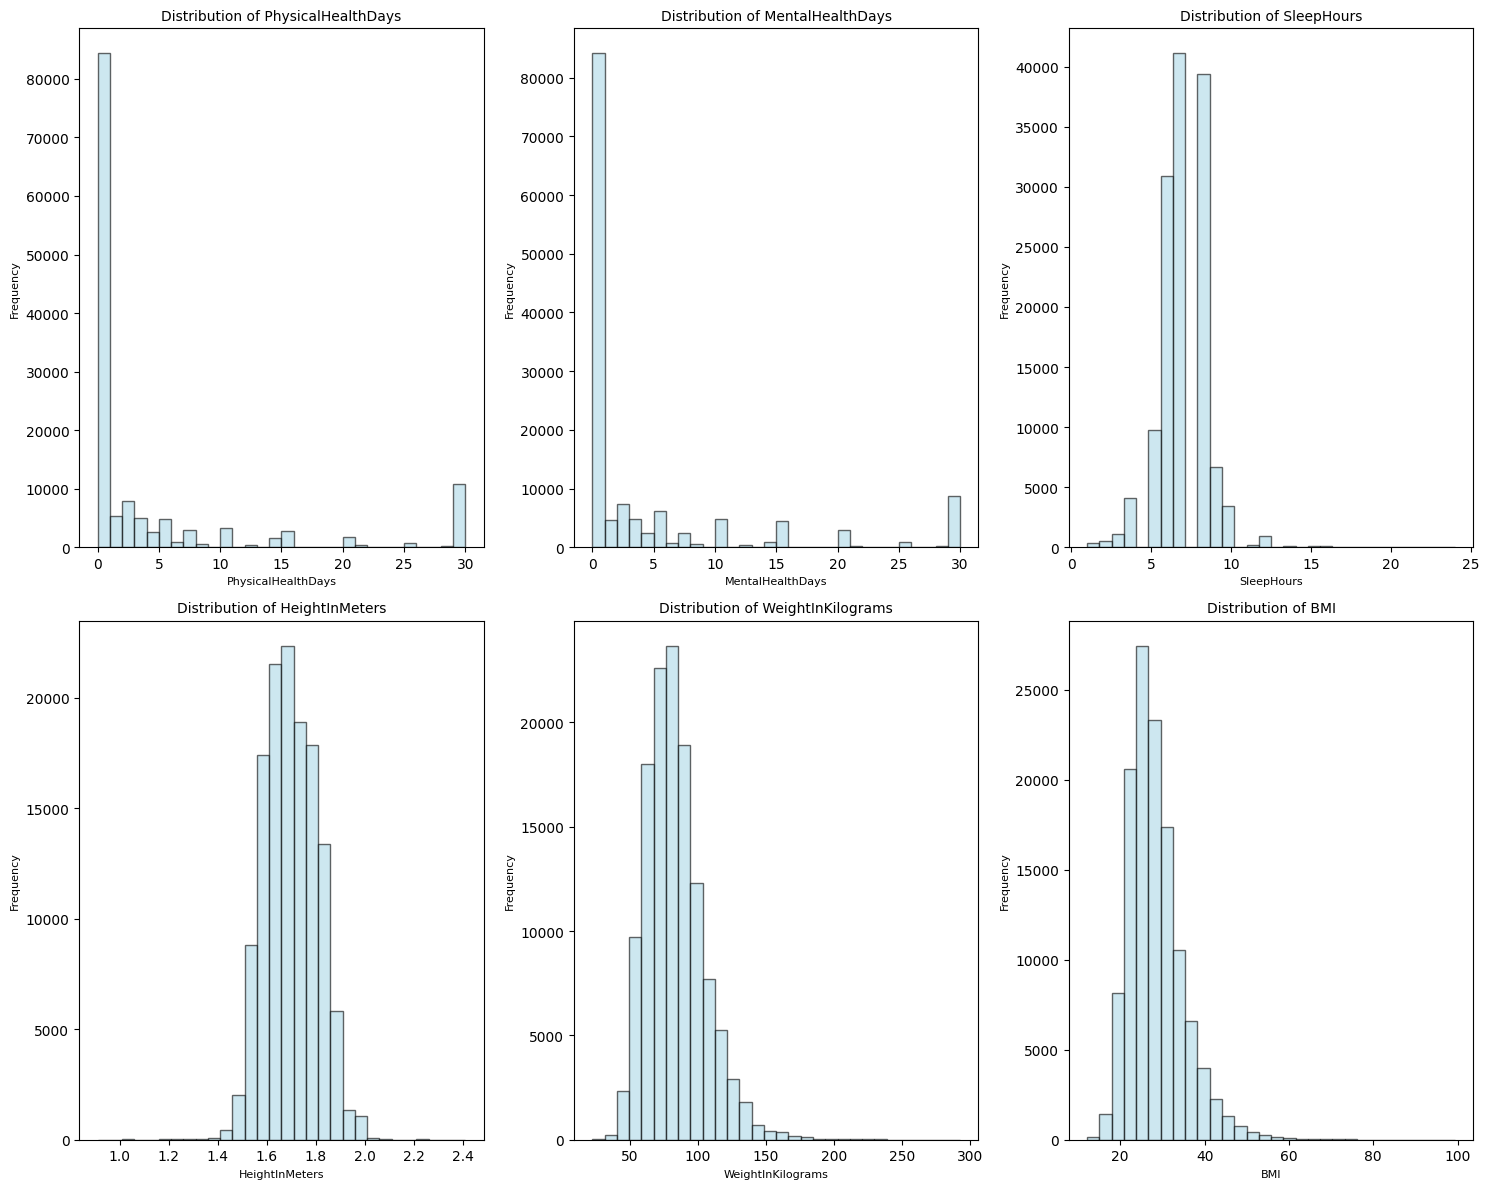

In [8]:
# List of numeric columns (excluding categorical columns like 'HadHeartAttack', 'HadAngina', etc.)
numeric_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
                   'HeightInMeters', 'WeightInKilograms', 'BMI']

# Convert numeric columns to numeric, coercing errors to NaN
for col in numeric_columns:
    heart_analysis[col] = pd.to_numeric(heart_analysis[col], errors='coerce')

# Set up the figure for plotting
plt.figure(figsize=(15, 12))

# Plot histograms for all numeric columns
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid for plotting (adjust if necessary)
    plt.hist(heart_analysis[col].dropna(), bins=30, edgecolor='black', color='lightblue', alpha=0.6)  # Increase number of bins and reduce alpha for shorter bars
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


## Handling numerical missing values using either mean or median

In [9]:
import pandas as pd

# Assuming heart_analysis is already loaded with your data

# List of columns and their respective treatment based on distribution
skewed_columns = ['PhysicalHealthDays', 'MentalHealthDays']
normal_columns = ['SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

# Replace missing values based on distribution
for col in skewed_columns:
    median_value = heart_analysis[col].median()  # Get the median for skewed data
    heart_analysis[col] = heart_analysis[col].fillna(median_value)  # Replace missing with median

for col in normal_columns:
    mean_value = heart_analysis[col].mean()  # Get the mean for normally distributed data
    heart_analysis[col] = heart_analysis[col].fillna(mean_value)  # Replace missing with mean

# Check if there are still missing values
missing_values = heart_analysis.isnull().sum()
print(missing_values)

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [19]:
# save a copy of the cleaned dataset
heart_analysis_2 = heart_analysis.to_csv('heart_analysis_cleaned.csv', index=False)

## **Exploratory Data Analysis (EDA)**

In [15]:
# Descriptive Statistics
heart_analysis.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,140816.000000,140816.000000,140816.000000,140816.000000,140816.000000,140816.000000
mean,4.298475,4.292438,7.010813,1.702631,82.769622,28.430014
std,8.671444,8.345337,1.512419,0.104264,20.443533,6.180269
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.160000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.390000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,28.250000
75%,3.000000,4.000000,8.000000,1.780000,90.720000,30.910000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.340000


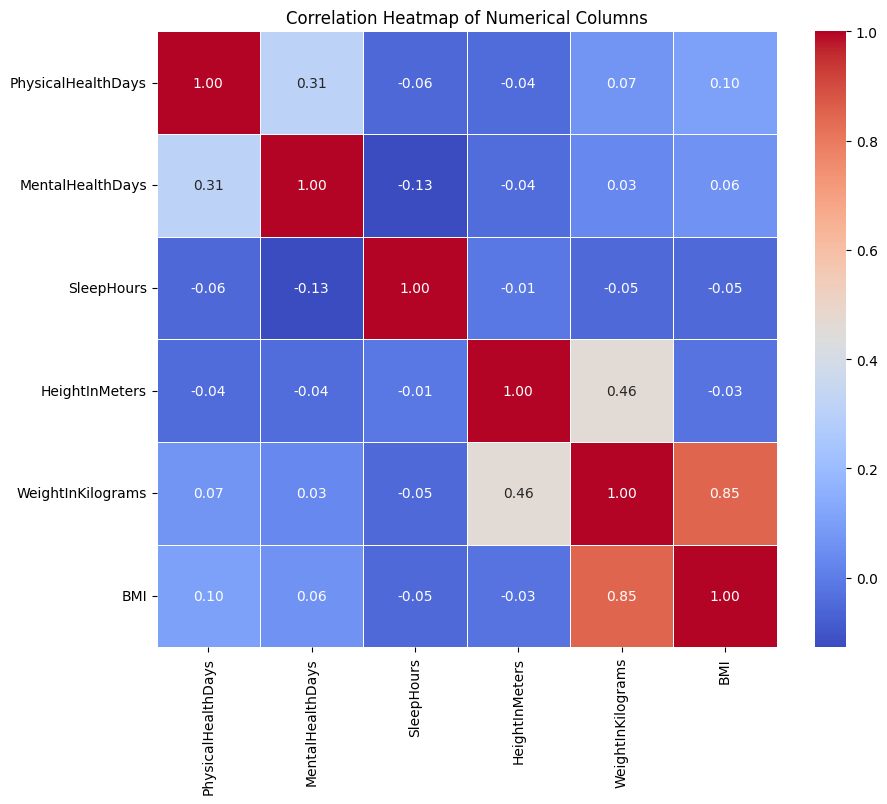

In [17]:
#Correlation Analysis

# List of numerical columns
numeric_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
                   'HeightInMeters', 'WeightInKilograms', 'BMI']

# Calculate the correlation matrix for the numerical columns
correlation_matrix = heart_analysis[numeric_columns].corr()

# Set up the figure for plotting
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Numerical Columns')

# Show the plot
plt.show()

# **Data Analysis**

## Problem Statement: Impact of Lifestyle Factors on Health

This analysis will examine how various lifestyle factors (such as smoking, physical activity, alcohol consumption, etc.) affect health metrics like Physical Health Days, Mental Health Days, and BMI. We will also explore how Sleep Hours, Physical Activities, and General Health impact health outcomes.

Key Questions to Answer:

1. How do lifestyle factors like smoking, physical activity, and alcohol consumption impact Physical Health Days and Mental Health Days?
2. Is there a relationship between sleep hours and health outcomes (Physical Health Days, Mental Health Days)?
3. How does BMI correlate with lifestyle choices such as smoking, physical activity, and alcohol consumption?
4. Do people who engage in more physical activity report fewer health problems (e.g., fewer Physical Health Days lost)?
5. What is the relationship between health conditions (like Diabetes, Heart Attack) and lifestyle factors (e.g., smoking, alcohol consumption)?

In [32]:
#check columns
heart_analysis.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'SmokerStatus_encoded',
       'AlcoholDrinkers_encoded', 'PhysicalActivities_encoded', 'BMICategory'],
      dtype='object')

In [30]:
# unique states
heart_analysis['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana'], dtype=object)

In [48]:
# List of health conditions to check
health_conditions = [
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands'
]

# Create an empty dictionary to store the state with the highest number for each condition
highest_state_per_condition = {}

# Loop through each health condition and find the state with the highest number of 'Yes'
for condition in health_conditions:
    # Convert 'Yes' to 1 and 'No' to 0, then group by state and sum the values
    condition_counts = heart_analysis[condition].map({'Yes': 1, 'No': 0}).groupby(heart_analysis['State']).sum()

    # Get the state with the highest count
    highest_state = condition_counts.idxmax()
    highest_count = condition_counts.max()

    # Store the result in the dictionary
    highest_state_per_condition[condition] = (highest_state, highest_count)

# Display the results for verification
highest_state_per_condition

{'HadHeartAttack': ('Florida', 1018),
 'HadAngina': ('Florida', 1094),
 'HadStroke': ('Florida', 795),
 'HadAsthma': ('Florida', 1878),
 'HadSkinCancer': ('Florida', 1897),
 'HadCOPD': ('Florida', 1490),
 'HadDepressiveDisorder': ('Florida', 2489),
 'HadKidneyDisease': ('Florida', 827),
 'HadArthritis': ('Florida', 5177),
 'HadDiabetes': ('Florida', 2103.0),
 'DeafOrHardOfHearing': ('Florida', 1347),
 'BlindOrVisionDifficulty': ('Florida', 879),
 'DifficultyConcentrating': ('Florida', 1567),
 'DifficultyWalking': ('Florida', 2451),
 'DifficultyDressingBathing': ('Florida', 592),
 'DifficultyErrands': ('Florida', 1059)}

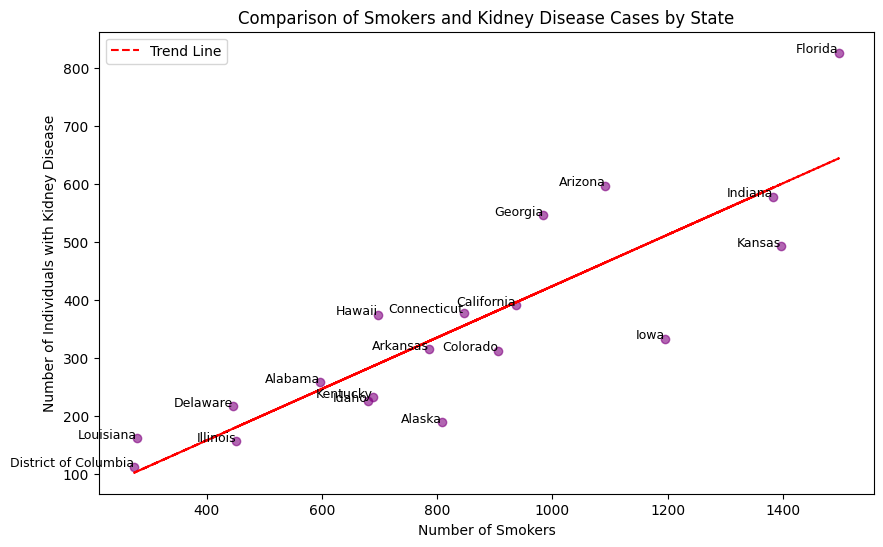

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define smoker categories based on your data
smoker_categories = ['Current smoker - now smokes some days', 'Current smoker - now smokes every day']

# Calculate the count of smokers by state
smoker_counts = heart_analysis[heart_analysis['SmokerStatus'].isin(smoker_categories)].groupby('State').size()

# Calculate the count of individuals with kidney disease by state
kidney_disease_counts = heart_analysis[heart_analysis['HadKidneyDisease'] == 'Yes'].groupby('State').size()

# Combine both series into a single DataFrame for easier plotting
comparison_df = pd.DataFrame({
    'Smokers': smoker_counts,
    'Kidney Disease': kidney_disease_counts
}).fillna(0)  # Fill NaN values with 0 for states with no counts

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Smokers'], comparison_df['Kidney Disease'], color='purple', alpha=0.6)

# Add labels to each point (state)
for state, row in comparison_df.iterrows():
    plt.text(row['Smokers'], row['Kidney Disease'], state, fontsize=9, ha='right')

# Calculate and plot the trend line
x = comparison_df['Smokers']
y = comparison_df['Kidney Disease']
m, b = np.polyfit(x, y, 1)  # Fit a line (degree 1 polynomial)
plt.plot(x, m*x + b, color='red', linestyle='--', linewidth=1.5, label='Trend Line')

# Set titles and labels without gridlines
plt.title('Comparison of Smokers and Kidney Disease Cases by State')
plt.xlabel('Number of Smokers')
plt.ylabel('Number of Individuals with Kidney Disease')
plt.legend()
plt.show()


In [45]:
# General Health
print(heart_analysis['GeneralHealth'].unique())

['Very good' 'Excellent' 'Fair' 'Poor' 'Good']


States ranked by general health:
State
District of Columbia    3.660488
Colorado                3.575761
Connecticut             3.573998
California              3.497261
Hawaii                  3.496321
Idaho                   3.476911
Delaware                3.457236
Alaska                  3.455754
Illinois                3.435404
Kansas                  3.430159
Iowa                    3.399039
Florida                 3.392892
Arizona                 3.381738
Georgia                 3.340191
Indiana                 3.338238
Kentucky                3.230922
Alabama                 3.226365
Louisiana               3.195155
Arkansas                3.180260
Name: HealthScore, dtype: float64


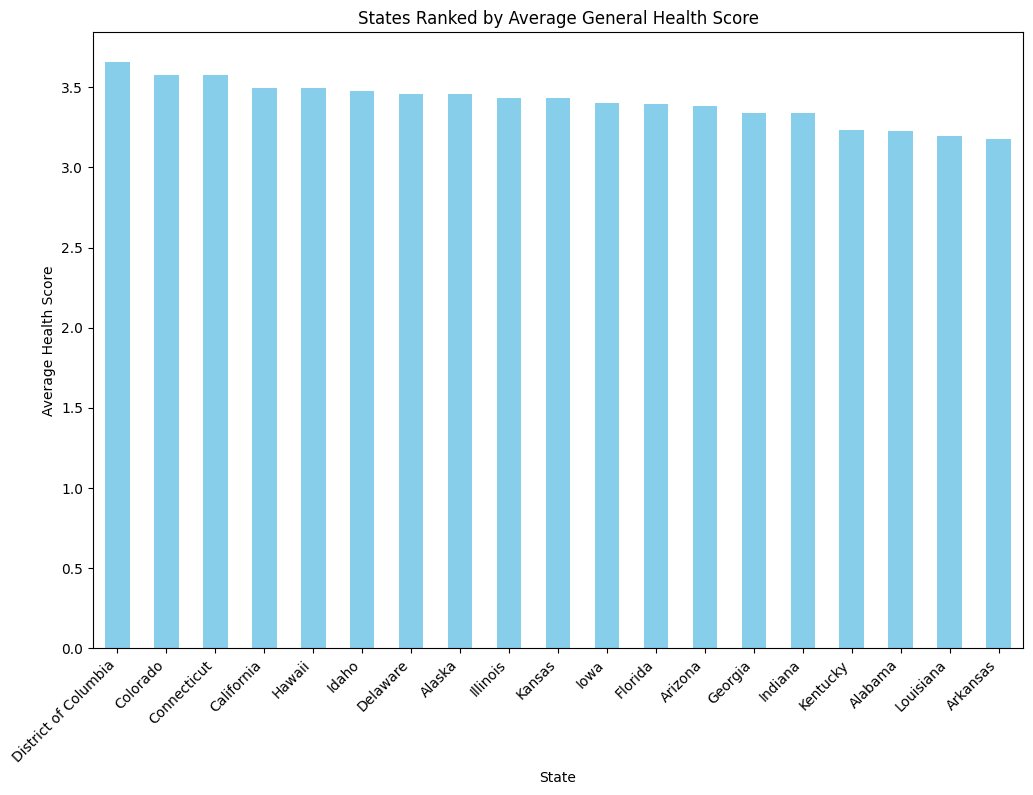

In [46]:
# Define a mapping for general health categories to numeric scores
health_score_mapping = {
    'Excellent': 5,
    'Very good': 4,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
}

# Create a new column 'HealthScore' by mapping the 'GeneralHealth' column to numeric scores
heart_analysis['HealthScore'] = heart_analysis['GeneralHealth'].map(health_score_mapping)

# Group by 'State' and calculate the average health score for each state
average_health_scores = heart_analysis.groupby('State')['HealthScore'].mean()

# Rank states by average health score in descending order
ranked_states = average_health_scores.sort_values(ascending=False)

# Display the ranked states
print("States ranked by general health:")
print(ranked_states)

# Optional: Plot the ranked states for visualization
plt.figure(figsize=(12, 8))
ranked_states.plot(kind='bar', color='skyblue')
plt.title('States Ranked by Average General Health Score')
plt.xlabel('State')
plt.ylabel('Average Health Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
print(heart_analysis['SmokerStatus'].unique())

['Never smoked' 'Current smoker - now smokes some days' 'Former smoker'
 'Current smoker - now smokes every day']


In [ ]:
#alcohol consumption
print
print(heart_analysis['SmokerStatus'].unique())

Number of smokers in Florida by gender:
Sex
Female    773
Male      724
dtype: int64


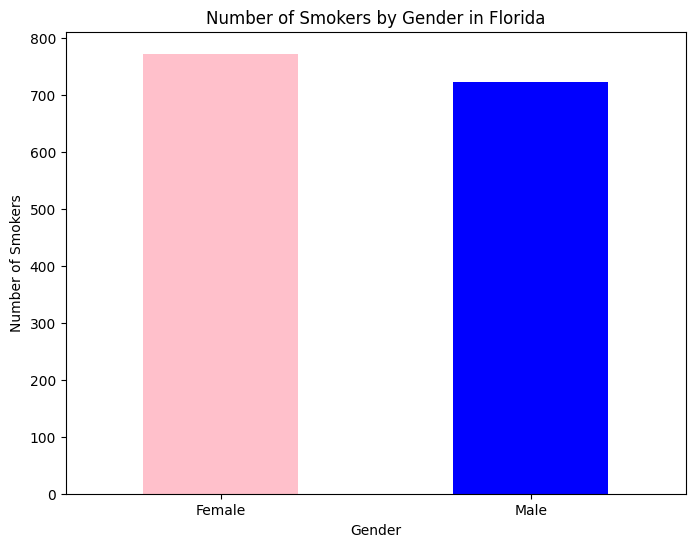

In [44]:
# Filter for rows where 'State' is 'Florida' and smoker status indicates they are a current smoker
florida_smokers = heart_analysis[(heart_analysis['State'] == 'Florida') &
                                 (heart_analysis['SmokerStatus'].isin(['Current smoker - now smokes some days',
                                                                       'Current smoker - now smokes every day']))]

# Group by 'Sex' and count the number of smokers
florida_smoker_counts_by_gender = florida_smokers.groupby('Sex').size()

# Display the results
print("Number of smokers in Florida by gender:")
print(florida_smoker_counts_by_gender)

# Plotting the results for visualization
florida_smoker_counts_by_gender.plot(kind='bar', color=['pink', 'blue'], figsize=(8, 6))
plt.title('Number of Smokers by Gender in Florida')
plt.xlabel('Gender')
plt.ylabel('Number of Smokers')
plt.xticks(rotation=0)
plt.show()